# MATH50003 Numerical Analysis: Problem Sheet 8

This problem sheet explores the Discrete Fourier Transform (DFT),
the Fast Fourier Transform (FFT), and orthogonal polynomials,

Questions marked with a ⋆ are meant to be completed without using a computer.
Problems are denoted A/B/C to indicate their difficulty.

In [3]:
using LinearAlgebra, Plots, Test

## 1. DFT

**Problem 1.1⋆ (C)** Show that the DFT $Q_n$ is symmetric ($Q_n = Q_n^⊤$) but not Hermitian ($Q_n ≠ Q_n^⋆$).

**SOLUTION**

First we remember the definitions we introduced. The DFT is

$$
\begin{align*}
Q_n &:= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} θ_1} & {\rm e}^{-{\rm i} θ_2} & ⋯ & {\rm e}^{-{\rm i} θ_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 θ_1} & {\rm e}^{-{\rm i} 2 θ_2} & ⋯ & {\rm e}^{-{\rm i} 2θ_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) θ_1} & {\rm e}^{-{\rm i} (n-1) θ_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) θ_{n-1}}
\end{bmatrix}
\end{align*}
$$

where $θ_j = 2πj/n$ for $j = 0,1,…,n$ and $ω := {\rm e}^{{\rm i} θ_1} = {\rm e}^{2 π {\rm i} \over n}$ are $n$ th roots of unity in the sense that $ω^n = 1$. So ${\rm e}^{{\rm i} θ_j} ={\rm e}^{2 π {\rm i} j \over n}= ω^j$. Note that $θ_j = 2π(j-1)/n+2π/n = θ_{j-1} + θ_1$. By completing this recurrence we find that $θ_j = jθ_1$, from which the following symmetric version follows immediately
$$
\begin{align*}
Q_n 
&= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & ω^{-1} & ω^{-2} & ⋯ & ω^{-(n-1)}\\
                                    1 & ω^{-2} & ω^{-4} & ⋯ & ω^{-2(n-1)}\\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & ω^{-(n-1)} & ω^{-2(n-1)} & ⋯ & ω^{-(n-1)^2}
\end{bmatrix}.
\end{align*}
$$
Now $Q_n^⋆$ is found to be
$$
\begin{align*}
Q_n^⋆ &= {1 \over √n} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & {\rm e}^{{\rm i} θ_1} & {\rm e}^{{\rm i} 2 θ_1} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_1} \\
1 &  {\rm e}^{{\rm i} θ_2}  & {\rm e}^{{\rm i} 2 θ_2} & ⋯ & {\rm e}^{{\rm i} (n-1)θ_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & {\rm e}^{{\rm i} θ_{n-1}} & {\rm e}^{{\rm i} 2 θ_{n-1}} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_{n-1}}
\end{bmatrix}
= {1 \over √n} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & ω^{1} & ω^{2} & ⋯ & ω^{(n-1)}\\
1 & ω^{2} & ω^{4} & ⋯ & ω^{2(n-1)}\\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & ω^{(n-1)} & ω^{2(n-1)} & ⋯ & ω^{(n-1)^2}
\end{bmatrix}
\end{align*}
$$
using the above arguments. Evidently, $Q_n^⋆ \neq Q_n$ since $ω \neq ω^{-1}$.

**END**


**Problem 1.2⋆ (A)** Show for $0 ≤ k,ℓ ≤ n-1$
$$
{1 \over n} \sum_{j=1}^n \cos k θ_j \cos ℓ θ_j = \begin{cases} 1 & k = ℓ = 0 \\
                                                  1/2 & k = ℓ \\
                                                  0 & \hbox{otherwise}
                                                  \end{cases}
$$
for $θ_j = π(j-1/2)/n$. Hint: Be careful as the $\theta_j$ differ from before, 
and only cover half the period, $[0,\pi]$. Using symmetry may help.
You may also consider replacing $\cos$ with 
complex exponentials:
$$
\cos θ = {{\rm e}^{{\rm i}θ} + {\rm e}^{-{\rm i}θ} \over 2}.
$$


**SOLUTION**
The case $k = \ell = 0$ is clear since $\cos(0)=1$ and $\frac{1}{n} \sum_n 1 = 1$.
For the other cases, we use the complex exponential representation to find that:
$$
{1 \over n} \sum_{j=1}^n \cos k θ_j \cos ℓ θ_j = {1 \over 4n} ( Σ_n[{\rm e}^{{\rm i} (k+ℓ) θ_j}] + 
Σ_n[{\rm e}^{{\rm i} (k-ℓ) θ_j}] + 
Σ_n[{\rm e}^{{\rm i} (ℓ-k) θ_j}] + Σ_n[{\rm e}^{{\rm i} (-k-ℓ) θ_j}])
$$
**END**



**Problem 1.3⋆ (B)** Consider the Discrete Cosine Transform (DCT)
$$
C_n := \begin{bmatrix}
\sqrt{1/n} \\
 & \sqrt{2/n} \\ 
 && ⋱ \\
 &&& \sqrt{2/n}
 \end{bmatrix}
\begin{bmatrix}
    1 & ⋯ & 1\\
    \cos θ_1 & ⋯ & \cos θ_n \\
    ⋮ & ⋱ & ⋮ \\
    \cos (n-1)θ_1 & ⋯ & \cos (n-1)θ_n
\end{bmatrix}
$$
for $θ_j = π(j-1/2)/n$. Prove that $C_n$ is orthogonal: $C_n^⊤ C_n = C_n C_n^⊤ = I$.
Hint: $C_n C_n^⊤ = I$ might be easier to show than $C_n^⊤ C_n = I$ using the previous problem.

**SOLUTION**

The components of $C$ without the diagonal matrix, which we may call $\hat{C}$ are
$$
\hat{C}_{ij} = \cos((j-1)θ_{i-1}),
$$
where $θ_j = π(j-1/2)/n$. Recalling that the elements of matrix multiplication are given by
$$
(ab)_{ij} := \sum_{k=1}^n a_{ik} b_{kj}
$$
we find that
$$
(\hat{C}_n \hat{C}_n^⊤)_{ij} = \sum_{k=1}^n \cos((i-1)θ_{k-1}) \cos((k-1)θ_{j-1}).
$$

By using the previous problem and the terms on the diagonal matrices which ensure that the $1/2$ terms become $1$ we know how to compute all of these entries and find that it is the identity.

Here is a computer-based demonstration:

In [4]:
n = 10
θ = range(π/(2n); step=π/n, length=n) # n evenly spaced points starting at π/(2n) with step size π/n
C = Diagonal([1/sqrt(n); fill(sqrt(2/n), n-1)]) * [cos((k-1)*θ[j]) for k=1:n, j=1:n]
C'C

10×10 Matrix{Float64}:
  1.0           3.18525e-17  -1.9692e-17   …  -1.04161e-18   1.59817e-16
  3.18525e-17   1.0           3.15615e-17      1.94168e-16  -3.39467e-16
 -1.9692e-17    3.15615e-17   1.0              3.4151e-17    4.29005e-17
  1.46173e-17   6.18906e-17  -8.71939e-17     -4.8386e-16    2.37214e-16
 -3.83754e-17   1.23093e-16  -7.59471e-17     -5.04681e-17   3.96805e-16
  1.29409e-16  -1.73389e-16   2.77887e-17  …   3.22809e-16  -8.83356e-16
  1.81485e-16  -2.80487e-16   7.24884e-17      4.9429e-16    3.05676e-16
  2.77165e-17  -8.61478e-17   3.11149e-16      2.14724e-16  -2.17458e-16
 -1.04161e-18   1.94168e-16   3.4151e-17       1.0          -7.06392e-18
  1.59817e-16  -3.39467e-16   4.29005e-17     -7.06392e-18   1.0

**END**

**Problem 1.4 (B)**  A function with a jump does not have uniformly
converging coefficients. Plot interpolant for ${\rm sign}(θ-1/2)$.
Conjecture where the approximation converges. (This is known as
Gibb's phenomena.) **Note** This is non-examinable as it is computer-based.

**SOLUTION**

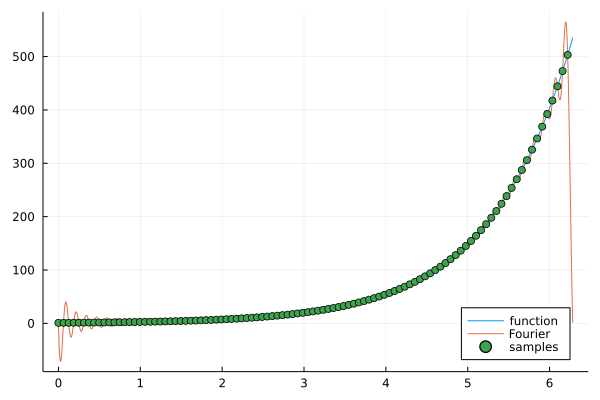

In [24]:
# We can use the interpolation function defined in the lecture notes to investigate this:

using Plots, LinearAlgebra


# evaluates f_n at a point
function finitefourier(𝐟̂ₙ, θ)
    m = n ÷ 2 # use coefficients between -m:m
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    for k = -m:-1
        ret += 𝐟̂ₙ[end+k+1] * exp(im*k*θ)
    end
    ret
end

f = θ -> exp(θ)
n = 101
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)



fₙ = θ -> finitefourier(𝐟̂ₙ, θ)

g = range(0, 2π; length=10000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")
scatter!(θ, f.(θ); label="samples")
# Gibb's phenomenon (will be similar with exact Fourier coefficents)

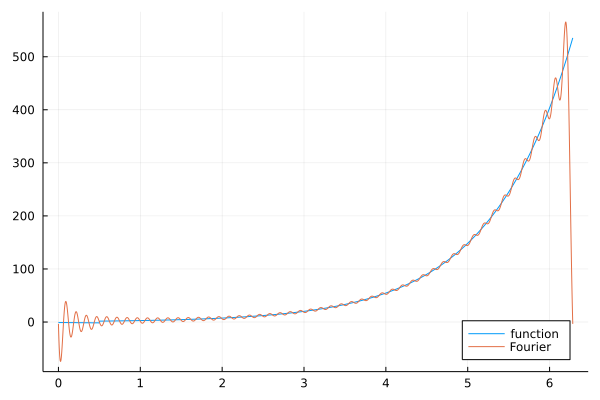

In [16]:
n = 100
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)


fₙ = θ -> finitefourier(𝐟̂ₙ, θ)

g = range(0, 2π; length=2000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")

It appears that adding more terms does not decrease the magnitude of the oscillations observed at the discontinuity. This is known as Gibbs phenomenon -- understanding this behavior is of critical importance not only in numerical analysis but also in applications such as signal processing.

**END**

## 2. FFT 

**Problem 2.1⋆ (B)** Show that $Q_{2n}$ can also be reduced to $Q_n$ applied
to two vectors.

**SOLUTION**
We saw in the lecture notes how this works for $Q_{2n}^⋆$:

$$
\begin{align*}
Q_{2n}^⋆ &= {1 \over \sqrt{2n}} \begin{bmatrix} 𝟏_{2n} | \vec{ω}_{2n} | \vec{ω}_{2n}^2 | ⋯ | \vec{ω}_{2n}^{2n-1} \end{bmatrix}
= {1 \over \sqrt{2n}} P_σ^⊤ \begin{bmatrix} 𝟏_{n} &   \vec{ω}_n        & \vec{ω}_n^2          & ⋯ & \vec{ω}_n^{n-1}          & \vec{ω}_n^n  & ⋯ & \vec{ω}_n^{2n-1}  \\
                        𝟏_{n} & ω_{2n} \vec{ω}_n & ω_{2n}^2 \vec{ω}_n^2 & ⋯ & ω_{2n}^{n-1} \vec{ω}_n^{n-1} & ω_{2n}^n \vec{ω}_n^n  & ⋯ & ω_{2n}^{2n-1} \vec{ω}_n^{2n-1}
\end{bmatrix} \\
&= {1 \over \sqrt{2}} P_σ^⊤ \begin{bmatrix} Q_n^⋆ & Q_n^⋆ \\
                                     Q_n^⋆ D_n & -Q_n^⋆ D_n
                                     \end{bmatrix} =
                                     {1 \over \sqrt{2}}P_σ^⊤ \begin{bmatrix} Q_n^⋆ \\ &Q_n^⋆ \end{bmatrix} \begin{bmatrix} I_n & I_n \\ D_n & -D_n \end{bmatrix}
\end{align*}
$$

A very similar chain of arguments can be made for $Q_{2n}$ but we can also infer it directly from the above, since $(Q_{2n}^⋆)^⋆ = Q_{2n}$, we find that

$$
Q_{2n} = \left({1 \over \sqrt{2}}P_σ^⊤ \begin{bmatrix} Q_n^⋆ \\ &Q_n^⋆ \end{bmatrix} \begin{bmatrix} I_n & I_n \\ D_n & -D_n \end{bmatrix}\right)^⋆ = {1 \over \sqrt{2}} \begin{bmatrix} I_n & D_n \\ I_n & -D_n \end{bmatrix} \begin{bmatrix} Q_n \\ &Q_n \end{bmatrix}  P_σ
$$

**END**

## 3. Orthogonal polynomials

**Problem 3.1⋆  (B)** Construct  $p_0(x),p_1(x),p_2(x),p_3(x)$, monic OPs
for the weight $\sqrt{1-x^2}$ on $[-1,1]$.
Hint: first compute $\int_{-1}^1 x^k \sqrt{1-x^2} {\rm d} x$ for $0 ≤ k ≤ 2$
using a change-of-variables.

Following the hint, we first calculate $\int_{-1}^1 x^k\sqrt{1-x^2}{\rm d}x$. By symmetry, it's zero when $k$ is odd and double the integral on $[0,1]$ when $k$ is even. 

$$
\underbrace{\int_0^1 x^k\sqrt{1-x^2}{\rm d}x}_{I_k} =_{x=\sin t}\underbrace{\int_0^{\pi/2}\sin^k(t)\cos^2(t){\rm d}t}_{I_k}=\underbrace{\int_0^{\pi/2}\sin^k t{\rm d}t}_{J_k}-\underbrace{\int_0^{\pi/2}\sin^{k+2}t{\rm d}t}_{J_{k+2}}.
$$

Meanwhile, 
$$J_k=-\int_0^{\pi/2}\sin^{k-1}t{\rm d}(\cos t) =_{\text{integral by part}}(k-1)I_{k-2}.$$

Putting the above 2 equations together, we have $I_k=(k-1)I_{k-2}-(k+1)I_k$, so $I_k=\frac{k-1}{k+2}I_{k-2}$. Since $I_0=\pi/4$, we have $I_k=\frac{(k-1)!!}{(k+2)!!}\frac{\pi}{2}$ for positive even $k$. (Note that the denominator multiplies to 4, not to 2.) Keep in mind that the integral we want is double this value when $k$ is even.

【Remark】Check the [beta function](https://en.wikipedia.org/wiki/Beta_function).

Let $p_0(x)=1$, then $\|p_0\|^2=2I_0=\pi/2$. We know from the 3-term recurrence that
$$xp_0(x)=a_0p_0(x)+p_1(x)$$
where
$$a_0=\frac{<p_0,xp_0>}{\|p_0\|^2}=0.$$
Thus $p_1(x)=x$ and $\|p_1\|^2=2I_2=\pi/8$.
From
$$xp_1(x)=c_0p_0(x)+a_1p_1(x)+p_2(x)$$
we have
$$c_0=\frac{<p_0,xp_1>}{\|p_0\|^2}=2I_2/2I_0=1/4$$
$$a_1=\frac{<p_1,xp_1>}{\|p_1\|^2}=0$$
$$p_2(x)=xp_1(x)-c_0-a_1p_1(x)=x^2-1/4$$
$$\|p_2\|^2=2I_4-I_2+1/8I_0=\pi/32$$
Finally, from
$$xp_2(x)=c_1p_1(x)+a_2p_2(x)+p_3(x)$$
we have
$$c_1=\frac{<p_1,xp_2>}{\|p_1\|^2}=(2I_4-1/2I_2)/(\pi/8)=1/4$$
$$a_2=\frac{<p_2,xp_2>}{\|p_2\|^2}=0$$
$$p_3(x)=xp_2(x)-c_1p_1(x)-a_2p_2(x)=x^3-1/2x$$

**Problem 3.2⋆  (C, 3-term recurrence, 1st form)**
Show that if $\{p_n\}$ are OPs then there exist real constants $A_n ≠ 0$, $B_n$, and $C_n$
such that
$$
\begin{align*}
p_1(x) &= (A_0 x + B_0) p_0(x) \\
p_{n+1}(x) &= (A_n x + B_n) p_n(x) - C_n p_{n-1}(x)
\end{align*}
$$
Write this as a lower triangular linear system, given $p_0(x) = \mu in \mathbb{R}$:
$$
L_x \begin{bmatrix} p_0(x) \\ \vdots \\ p_{n+1}(x) \end{bmatrix} = \begin{bmatrix} \mu \\ 0 \\ \vdots \\ 0 \end{bmatrix}
$$

**SOLUTION**

The 2nd form of 3-term recurrence is
$$xp_0(x)=a_0p_0(x)+b_0p_1(x)$$
and
$$xp_n(x)=c_{n-1}p_{n-1}(x)+a_np_n(x)+b_np_{n+1}(x)$$
which is equivalent to
$$p_1(x)=\left(\frac{1}{b_0}x-\frac{a_0}{b_0}\right)p_0(x),$$
$$p_{n+1}(x)=\left(\frac{1}{b_n}x-\frac{a_n}{b_n}\right)p_n(x)-\frac{c_{n-1}}{b_n}p_{n-1}(x).$$
So we have $A_n=1/b_n$, $B_n=-\frac{a_n}{b_n}$ and $C_n=\frac{c_{n-1}}{b_n}$.

Writing down the recurrence for every $n$, we have a lower tridiagonal linear system
$$
\underbrace{\begin{bmatrix}
1 &&&&\\
-A_0x-B_0 & 1 &&&\\
C_1 & -A_1x-B_1 & 1 &&\\
& \ddots &\ddots&\ddots&\\
&&C_{n}&-A_nx-B_n&1
\end{bmatrix}}_{L_x}
\underbrace{\begin{bmatrix} p_0(x) \\ \vdots \\ p_{n+1}(x) \end{bmatrix}}_{\mathbf{P}(x)} = \underbrace{\begin{bmatrix} c \\ 0 \\ \vdots \\ 0 \end{bmatrix}}_{\mu\mathbf{e}_1}
$$


**Problem 3.3⋆  (B)** Show that if $f(x)$ is a degree $n-1$ polynomial
$$
f(x) = [p_0(x) | ⋯ | p_{n-1}(x)] \underbrace{\begin{bmatrix} c_0 \\ \vdots \\ c_{n-1} \end{bmatrix}}_{\bf c}
$$
then evaluation at a point can be recast as inverting an upper triangular system
(_Clenshaw's algorithm_):
$$
f(x) = μ𝐞_1^⊤ U_x^{-1} {\bf c}.
$$

**SOLUTION**

We know from Problem 3.2 that 3-term recurrence can be viewed as a lower tridiagonal system. For general family of polynomials, we don't have 3-term recurrence, but we can always have dense recurrence as
$$p_{n+1}(x)=(A_nx+B_n)p_n(x)-C_np_{n-1}(x)-D_np_{n-2}(x)-\cdots$$
which can be viewd as
$$L_x\mathbf{P}(x)=\mu\mathbf{e}_1.$$
where $L_x$ is lower triangular (for general polynomials) instead of lower tridiagonal (for orthogonal polynomials). Then
$$f(x)=\mathbf{P}^\top(x)\mathbf{c}=(\mu L_x^{-1}\mathbf{e}_1)^\top\mathbf{c}=\mu\mathbf{e}_1^\top U_x^{-1}\mathbf{c}$$
where $U_x=L_x^\top$.

**Problem 3.4⋆  (B)** If $w(-x) = w(x)$ for a weight supported on $[-b,b]$ show that $a_n = 0$.
Hint: first show that the (monic) polynomials $p_{2n}(x)$ are even and $p_{2n+1}(x)$ are odd.

**SOLUTION**

Note that $p_0(x)$ is even. $a_0$ is zero:
$$
⟨p_0,x p_0(x)⟩ = \int_{-b}^b x w(x) {\rm d} x = 0
$$
which shows that
$$
p_1(x) = xp_0(x)
$$
is odd. We now proceed by induction. We have:
$$
⟨p_{2n},x p_{2n}(x)⟩ = \int_{-b}^b x w(x) p_{2n}(x)^2 {\rm d} x = 0
$$
since $x w(x) p_{2n}(x)^2$ is odd. Meanwhile. This show that if $p_{2n}$ and
$p_{2n-1}(x)$ is odd then
$$
p_{2n+1}(x) 
$$



**END**